In [25]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load 
covid19_with_pop_land = "Covid_march15_withPopulation_land.csv"

# Read covid19 file and store into Pandas data frame
covid19_df = pd.read_csv(covid19_with_pop_land)
covid19_df

,LOC_id,ISOALPHA,COUNTRYNM,NAME1,Confirmed,Deaths,Recovered,Latitude,Longitude,population,land,risk_Permillion
0,1,AFG,Afghanistan,NaN,16,0,0,33.9391,67.7100,36442712,640733.2562,0.44
1,2,ALB,Albania,NaN,42,1,0,41.1533,20.1683,2935139,28195.68869,14.31
2,3,DZA,Algeria,NaN,48,4,12,28.0339,1.6596,43007779,2315206.619,1.12
3,4,AND,Andorra,NaN,1,0,1,42.5063,1.5218,69654,452.0699393,14.36
4,5,ATG,Antigua and Barbuda,NaN,1,0,0,17.0608,-61.7964,96412,430.6744232,10.37
...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,VIR,United States Virgin Islands,NaN,1,0,0,18.3358,-64.8963,107016,362.5222542,9.34
252,197,URY,Uruguay,NaN,4,0,0,-32.5228,-55.7658,3494819,174772.9719,1.14
253,254,UZB,Uzbekistan,NaN,1,0,0,41.3775,64.5853,31767437,428650.2341,0.03
254,255,VEN,Venezuela (Bolivarian Republic of),NaN,10,0,0,6.4238,-66.5897,33116328,905593.4328,0.3


In [5]:
# Read Multi-dimentional poverity index file and store into Pandas data frame

multi_poverty_index = "mpi_table_2019_final_0_clean_sheet1.csv"
mpi_df = pd.read_csv(multi_poverty_index)
mpi_df

,Country,Yr and Survey 2007-2018,Index Value,Headcount (%),Intensity of deprivation(%),# of poor (thousands),# of poor 2017 (thousands),Inequality among poor -Value,Population in severe multi poverty (%),Population vunerable to multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %,Standard of living %,National Poverty Line % - 2007-2018,PPP $1.90/day $ 2007-2017
0,Afghanistan,2015/2016 D,0.272,55.9,48.6,"19,376","19,865",0.02,24.9,18.1,10.0,45.0,45.0,54.5,NaN
1,Albania,2017/2018 D,0.003,0.7,39.1,21,21,..,0.1,5.0,28.3,55.1,16.7,14.3,1.1
2,Algeria,2012/2013 M,0.008,2.1,38.8,805,868,0.006,0.3,5.8,29.9,46.8,23.2,5.5,0.5
3,Angola,2015/2016 D,0.282,51.1,55.3,"14,725","15,221",0.024,32.5,15.5,21.2,32.1,46.8,36.6,30.1
4,Armenia,2015/2016 D,0.001,0.2,36.2,5,5,..,0.0,2.7,33.1,36.8,30.1,25.7,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Vanuatu,2007 M,0.174,38.8,44.9,85,107,0.012,10.2,32.3,21.4,22.5,56.2,12.7,13.1
97,Viet Nam,2013/2014 M,0.019,4.9,39.5,"4,530","4,677",0.01,0.7,5.6,15.2,42.6,42.2,9.8,2.0
98,Yemen,2013 D,0.241,47.7,50.5,"12,199","13,475",0.021,23.9,22.1,28.3,30.7,41.0,48.6,18.8
99,Zambia,2013/2014 D,0.261,53.2,49.1,"8,317","9,102",0.017,24.2,22.5,23.7,22.5,53.7,54.4,57.5


In [8]:
merged_df = covid19_df.merge(mpi_df, how='inner', left_on='COUNTRYNM', right_on='Country')
merged_df

,LOC_id,ISOALPHA,COUNTRYNM,NAME1,Confirmed,Deaths,Recovered,Latitude,Longitude,population,...,# of poor (thousands),# of poor 2017 (thousands),Inequality among poor -Value,Population in severe multi poverty (%),Population vunerable to multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %,Standard of living %,National Poverty Line % - 2007-2018,PPP $1.90/day $ 2007-2017
0,1,AFG,Afghanistan,NaN,16,0,0,33.9391,67.7100,36442712,...,"19,376","19,865",0.02,24.9,18.1,10.0,45.0,45.0,54.5,NaN
1,2,ALB,Albania,NaN,42,1,0,41.1533,20.1683,2935139,...,21,21,..,0.1,5.0,28.3,55.1,16.7,14.3,1.1
2,3,DZA,Algeria,NaN,48,4,12,28.0339,1.6596,43007779,...,805,868,0.006,0.3,5.8,29.9,46.8,23.2,5.5,0.5
3,7,ARM,Armenia,NaN,26,0,0,40.0691,45.0382,3038110,...,5,5,..,0.0,2.7,33.1,36.8,30.1,25.7,1.4
4,20,BGD,Bangladesh,NaN,5,0,0,23.6850,90.3563,170466778,...,"66,468","68,663",0.016,16.7,21.4,23.5,29.2,47.3,24.3,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,188,TGO,Togo,NaN,1,0,0,8.6195,0.8248,8293638,...,"3,481","3,755",0.023,24.3,21.8,21.7,28.4,50.0,55.1,49.2
84,189,TTO,Trinidad and Tobago,NaN,2,0,0,10.6918,-61.2225,1377749,...,8,9,..,0.1,3.7,45.5,34.0,20.5,NaN,NaN
85,190,TUN,Tunisia,NaN,18,0,0,33.8869,9.5375,11835280,...,144,153,0.006,0.2,3.7,25.7,50.2,24.1,15.2,0.3
86,192,UKR,Ukraine,NaN,3,1,0,48.3794,31.1656,43679303,...,109,106,..,0.0,0.4,59.7,28.8,11.5,2.4,0.1


In [10]:
merged_sorted_df = merged_df.sort_values(by='Confirmed', ascending=False)
merged_sorted_df

,LOC_id,ISOALPHA,COUNTRYNM,NAME1,Confirmed,Deaths,Recovered,Latitude,Longitude,population,...,# of poor (thousands),# of poor 2017 (thousands),Inequality among poor -Value,Population in severe multi poverty (%),Population vunerable to multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %,Standard of living %,National Poverty Line % - 2007-2018,PPP $1.90/day $ 2007-2017
25,44,CHN,China,HuBei,67794,3085,54288,30.9756,112.2707,54007000,...,"53,688","54,437",0.005,0.3,17.1,35.2,39.2,25.5,3.1,0.7
18,45,CHN,China,GuangDong,1360,8,1304,23.3417,113.4244,123253462,...,"53,688","54,437",0.005,0.3,17.1,35.2,39.2,25.5,3.1,0.7
23,46,CHN,China,HeNan,1273,22,1250,33.8820,113.6140,94863267,...,"53,688","54,437",0.005,0.3,17.1,35.2,39.2,25.5,3.1,0.7
43,47,CHN,China,ZheJiang,1231,1,1211,29.1832,120.0934,62703652,...,"53,688","54,437",0.005,0.3,17.1,35.2,39.2,25.5,3.1,0.7
26,48,CHN,China,HuNan,1018,4,1014,27.6104,111.7088,66387108,...,"53,688","54,437",0.005,0.3,17.1,35.2,39.2,25.5,3.1,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,110,GTM,Guatemala,NaN,1,0,0,15.7835,-90.2308,18014914,...,"4,694","4,885",0.013,11.2,21.1,26.3,35.0,38.7,59.3,8.7
50,104,GAB,Gabon,NaN,1,0,0,-0.8037,11.6094,1917170,...,261,301,0.013,4.7,17.5,31.0,22.2,46.8,33.4,3.4
49,96,ETH,Ethiopia,NaN,1,0,0,9.1450,40.4897,111971077,...,"85,511","87,643",0.024,61.5,8.9,19.7,29.4,50.8,23.5,27.3
40,76,CHN,China,XiZangZiZhiQu,1,0,1,31.6927,88.0924,3356750,...,"53,688","54,437",0.005,0.3,17.1,35.2,39.2,25.5,3.1,0.7


In [19]:
merged_grouped_df = merged_sorted_df.groupby("COUNTRYNM").mean()
merged_grouped_df

,LOC_id,Confirmed,Deaths,Recovered,Latitude,Longitude,Index Value,Headcount (%),Intensity of deprivation(%),Population in severe multi poverty (%),Population vunerable to multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %,Standard of living %,National Poverty Line % - 2007-2018,PPP $1.90/day $ 2007-2017
COUNTRYNM,,,,,,,,,,,,,,,,
Afghanistan,1.000000,16.0,0.000000,0.000000,33.939100,67.710000,0.272,55.9,48.6,24.9,18.1,10.0,45.0,45.0,54.5,NaN
Albania,2.000000,42.0,1.000000,0.000000,41.153300,20.168300,0.003,0.7,39.1,0.1,5.0,28.3,55.1,16.7,14.3,1.1
Algeria,3.000000,48.0,4.000000,12.000000,28.033900,1.659600,0.008,2.1,38.8,0.3,5.8,29.9,46.8,23.2,5.5,0.5
Armenia,7.000000,26.0,0.000000,0.000000,40.069100,45.038200,0.001,0.2,36.2,0.0,2.7,33.1,36.8,30.1,25.7,1.4
Bangladesh,20.000000,5.0,0.000000,0.000000,23.685000,90.356300,0.198,41.7,47.5,16.7,21.4,23.5,29.2,47.3,24.3,14.8
Bhutan,23.000000,1.0,0.000000,0.000000,27.514200,90.433600,0.175,37.3,46.8,14.7,17.7,24.2,36.6,39.2,8.2,1.5
Bolivia (Plurinational State of),24.000000,10.0,0.000000,0.000000,-16.290200,-63.588700,0.094,20.4,46.0,7.1,15.7,21.6,26.6,51.8,36.4,5.8
Bosnia and Herzegovina,25.000000,24.0,0.000000,0.000000,43.915900,17.679100,0.008,2.2,37.9,0.1,4.1,79.7,7.2,13.1,16.9,0.1
Brazil,26.000000,162.0,0.000000,0.000000,-14.235000,-51.925300,0.016,3.8,42.5,0.9,6.2,49.8,22.9,27.3,26.5,4.8


In [29]:
reduced_df = merged_grouped_df[['Confirmed','Deaths','Recovered','Intensity of deprivation(%)',
                                'Population in severe multi poverty (%)',
                                'Health Contrib to Poverty (%)',
                                'Education Contrib to Poverty %']].reset_index()
reduced_df


,COUNTRYNM,Confirmed,Deaths,Recovered,Intensity of deprivation(%),Population in severe multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %
0,Afghanistan,16.0,0.000000,0.000000,48.6,24.9,10.0,45.0
1,Albania,42.0,1.000000,0.000000,39.1,0.1,28.3,55.1
2,Algeria,48.0,4.000000,12.000000,38.8,0.3,29.9,46.8
3,Armenia,26.0,0.000000,0.000000,36.2,0.0,33.1,36.8
4,Bangladesh,5.0,0.000000,0.000000,47.5,16.7,23.5,29.2
5,Bhutan,1.0,0.000000,0.000000,46.8,14.7,24.2,36.6
6,Bolivia (Plurinational State of),10.0,0.000000,0.000000,46.0,7.1,21.6,26.6
7,Bosnia and Herzegovina,24.0,0.000000,0.000000,37.9,0.1,79.7,7.2
8,Brazil,162.0,0.000000,0.000000,42.5,0.9,49.8,22.9
9,Burkina Faso,3.0,0.000000,0.000000,61.9,64.8,20.0,40.6


Text(0, 0.5, 'Intensity of Deprivation %')

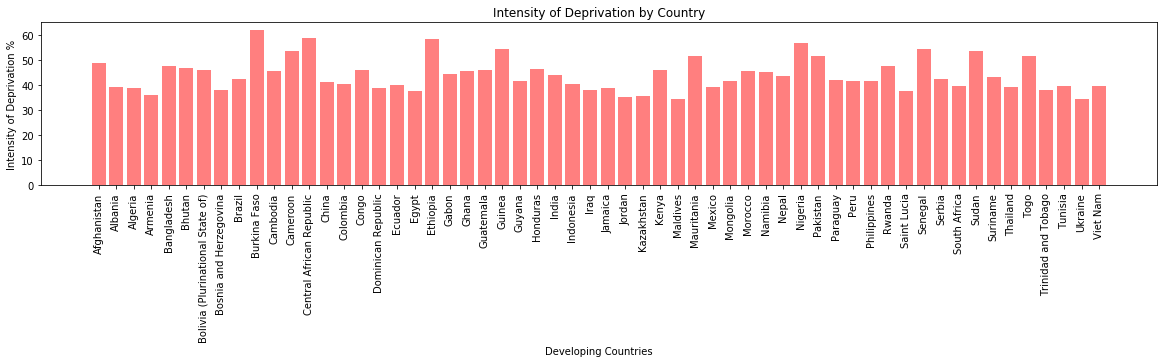

In [31]:
# Create a bar chart showing Intensity of Deprivation by Country - based on the Global Multidimensional Poverty Index

x_axis = np.arange(len(reduced_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, reduced_df["Intensity of deprivation(%)"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, reduced_df["COUNTRYNM"], rotation="vertical")
plt.title("Intensity of Deprivation by Developing Country")
plt.xlabel("Developing Countries")
plt.ylabel("Intensity of Deprivation %")

Text(0, 0.5, 'Population in severe multi poverty %')

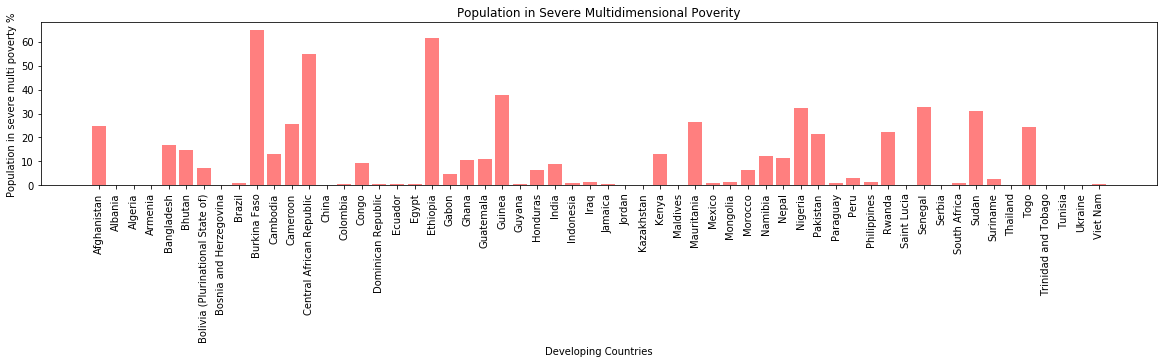

In [32]:
# Create a bar chart showing % of population in severe multi poverty by Country 
# based on the Global Multidimensional Poverty Index

x_axis = np.arange(len(reduced_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, reduced_df["Population in severe multi poverty (%)"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, reduced_df["COUNTRYNM"], rotation="vertical")
plt.title("Population in Severe Multidimensional Poverity")
plt.xlabel("Developing Countries")
plt.ylabel("Population in severe multi poverty %")

Text(0, 0.5, 'Healty Contribution to Poverty %')

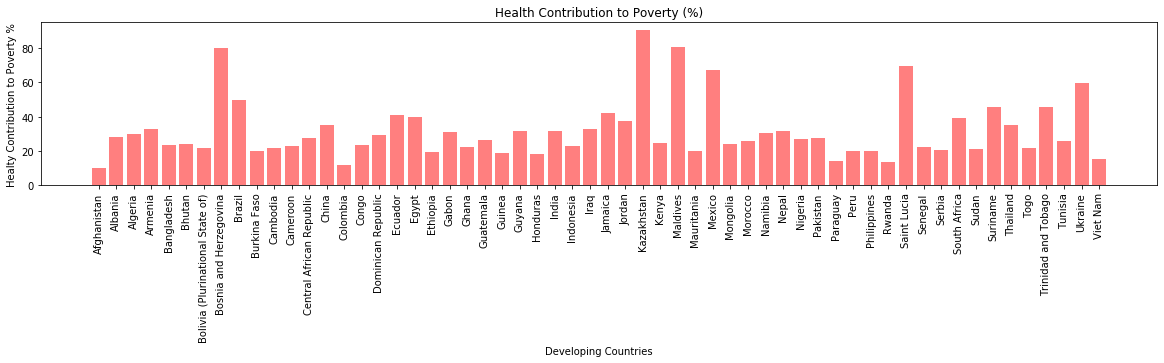

In [33]:
# Create a bar chart showing health contribution to poverty by Country 
# based on the Global Multidimensional Poverty Index

x_axis = np.arange(len(reduced_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, reduced_df["Health Contrib to Poverty (%)"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, reduced_df["COUNTRYNM"], rotation="vertical")
plt.title("Health Contribution to Poverty (%)")
plt.xlabel("Developing Countries")
plt.ylabel("Healty Contribution to Poverty %")

Text(0, 0.5, 'Education Contribution to Poverty %')

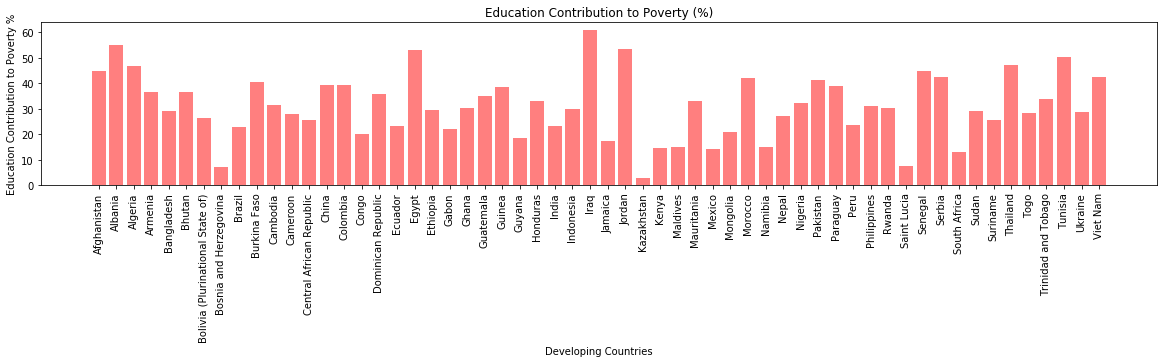

In [34]:
# Create a bar chart showing education contribution to poverty by Country 
# based on the Global Multidimensional Poverty Index

x_axis = np.arange(len(reduced_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, reduced_df["Education Contrib to Poverty %"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, reduced_df["COUNTRYNM"], rotation="vertical")
plt.title("Education Contribution to Poverty (%)")
plt.xlabel("Developing Countries")
plt.ylabel("Education Contribution to Poverty %")